# **Proyek Akhir : Membuat Model Sistem Rekomendasi Film**

### Deskripsi Proyek
Proyek ini mengembangkan Sistem Rekomendasi Film menggunakan berbagai algoritma machine learning untuk memberikan rekomendasi film yang personal dan akurat kepada pengguna. Sistem ini memanfaatkan dataset film dari Kaggle yang berisi metadata film, rating, cast, crew, dan keywords untuk membangun model rekomendasi berbasis konten (content-based filtering).
Sistem ini mengimplementasikan 5 model berbeda dan membandingkan performanya untuk mendapatkan model terbaik:

- TF-IDF + Cosine Similarity
- Count Vectorizer + Cosine Similarity
- SVD + Cosine Similarity
- K-Nearest Neighbors (KNN)
- Hybrid Content-Based

### Tujuan Proyek
1. Membangun sistem rekomendasi film yang dapat memberikan saran film relevan berdasarkan preferensi pengguna
2. Membandingkan performa berbagai algoritma machine learning untuk rekomendasi
3. Mengidentifikasi model terbaik dengan akurasi dan relevansi tertinggi
4. Mengembangkan antarmuka interaktif untuk penggunaan praktis

###Tujuan Teknis:

- Mengimplementasikan teknik feature engineering untuk data film
- Menerapkan berbagai algoritma similarity dan clustering
- Melakukan evaluasi model menggunakan metrik precision@k
- Menciptakan sistem hybrid yang menggabungkan kekuatan multiple algoritma

# **1. Import Library**


Pada tahap ini, saya mengimpor semua library yang diperlukan untuk proyek sistem rekomendasi film. Library pandas dan numpy untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, serta berbagai library sklearn untuk implementasi algoritma machine learning. Library ast digunakan untuk parsing data JSON, sedangkan re dan Counter untuk text processing. Pengaturan pandas display memungkinkan kita melihat data dengan lebih jelas.

In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors

# Text Processing
import re
from collections import Counter
import ast

# Set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("All libraries imported successfully!")

All libraries imported successfully!


insight :
- Semua library berhasil diimpor tanpa error,

# **2. data loading**

Pada tahap ini, saya melakukan pengunduhan dataset dari Kaggle dan memuat data ke dalam DataFrame. Dataset yang digunakan berisi informasi tentang The Movies Dataset.

In [2]:
!KAGGLE_USERNAME="aldy776" KAGGLE_KEY="c1071d6743b29ea1bffae7d6afaacd5d" kaggle datasets download -d rounakbanik/the-movies-dataset

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


insight:
- kode ini digunakan untuk mengunduh dataset dari kaggle

In [3]:
import zipfile
import os

# Nama file zip yang sudah diunduh
zip_file = 'the-movies-dataset.zip'  # pastikan nama ini sesuai dengan file hasil download dari Kaggle
extract_path = '/content/data'
os.makedirs(extract_path, exist_ok=True)

# Daftar file yang ingin diekstrak
target_files = ['movies_metadata.csv','credits.csv', 'ratings.csv','ratings_small.csv','keywords.csv','links_small.csv']

try:
    print("Ekstraksi dimulai...")
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        # Ambil nama file di dalam zip
        zip_contents = zip_ref.namelist()

        # Filter hanya file yang sesuai dengan daftar target
        files_to_extract = [f for f in zip_contents if any(target in f for target in target_files)]

        # Ekstrak file yang diinginkan
        for file in files_to_extract:
            zip_ref.extract(file, extract_path)
            print(f"Diekstrak: {file}")

    print(f"File yang dibutuhkan berhasil diekstrak ke: {extract_path}")
except zipfile.BadZipFile:
    print("Gagal mengekstrak: file zip rusak atau tidak valid")
except Exception as e:
    print(f"Terjadi kesalahan: {str(e)}")


Ekstraksi dimulai...
Diekstrak: credits.csv
Diekstrak: keywords.csv
Diekstrak: links_small.csv
Diekstrak: movies_metadata.csv
Diekstrak: ratings.csv
Diekstrak: ratings_small.csv
File yang dibutuhkan berhasil diekstrak ke: /content/data


 Kode ini membuat direktori tujuan dan mengekstrak file zip dataset dengan error handling untuk menangani kemungkinan kesalahan.

In [4]:
print("\nLoading datasets...")
movies_metadata = pd.read_csv("/content/data/movies_metadata.csv", low_memory=False)
ratings = pd.read_csv("/content/data/ratings.csv")
credits = pd.read_csv("/content/data/credits.csv")
keywords = pd.read_csv("/content/data/keywords.csv")
small_ratings = pd.read_csv("/content/data/ratings_small.csv")
links_small = pd.read_csv("/content/data/links_small.csv")



print("Dataset berhasil dimuat!")
print(f"Movies shape: {movies_metadata.shape}")
print(f"Ratings shape: {ratings.shape}")
print(f"Credits shape: {credits.shape}")
print(f"Keywrods shape: {keywords.shape}")
print(f"Small ratings shape: {small_ratings.shape}")
print(f"Links small shape: {links_small.shape}")


Loading datasets...
Dataset berhasil dimuat!
Movies shape: (45466, 24)
Ratings shape: (26024289, 4)
Credits shape: (45476, 3)
Keywrods shape: (46419, 2)
Small ratings shape: (100004, 4)
Links small shape: (9125, 3)


memasukan data pada dataframe

# **3. data understanading**

Tahap ini bertujuan untuk memahami struktur, karakteristik, dan kualitas data yang akan digunakan. Langkah ini penting untuk mengidentifikasi masalah data dan merencanakan preprocessing yang diperlukan.

In [5]:
print("MOVIES METADATA INFO:")
print("=" * 30)

# Basic info
num_rows, num_cols = movies_metadata.shape
print(f"Jumlah film  : {num_rows}")
print(f"Jumlah kolom : {num_cols}")

# Menampilkan daftar kolom
print("\nDaftar Kolom:")
for col in movies_metadata.columns:
    print(f"- {col}")



MOVIES METADATA INFO:
Jumlah film  : 45466
Jumlah kolom : 24

Daftar Kolom:
- adult
- belongs_to_collection
- budget
- genres
- homepage
- id
- imdb_id
- original_language
- original_title
- overview
- popularity
- poster_path
- production_companies
- production_countries
- release_date
- revenue
- runtime
- spoken_languages
- status
- tagline
- title
- video
- vote_average
- vote_count


**Insight**:

Dataset memiliki **24 kolom** dengan informasi komprehensif, mulai dari **metadata dasar** hingga **informasi produksi dan rating**.


In [6]:
print(" Missing Values:")
missing_data = movies_metadata.isnull().sum()
missing_percent = (missing_data / len(movies_metadata)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Percentage', ascending=False)
print(missing_df.head(10))


 Missing Values:
                       Missing Count  Percentage
belongs_to_collection          40972   90.115691
homepage                       37684   82.883913
tagline                        25054   55.104914
overview                         954    2.098271
poster_path                      386    0.848986
runtime                          263    0.578454
status                            87    0.191352
release_date                      87    0.191352
imdb_id                           17    0.037391
original_language                 11    0.024194


#### Temuan Penting

- **belongs_to_collection**: 90.1% missing *(dapat diabaikan)*
- **homepage**: 82.9% missing *(tidak kritis untuk rekomendasi)*
- **tagline**: 55.1% missing *(dapat diisi atau diabaikan)*
- **overview**: 2.1% missing **(penting untuk content-based filtering)**


In [7]:
print(" GENRE ANALYSIS")
print("-"*30)

import ast
from collections import Counter

# Function to extract genres
def extract_genres(genres_str):
    try:
        genres_list = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres_list]
    except:
        return []

# Extract all genres
movies_clean = movies_metadata.dropna(subset=['genres']).copy()
movies_clean['genre_list'] = movies_clean['genres'].apply(extract_genres)
# Hitung frekuensi genre
all_genres = []
for genres in movies_clean['genre_list']:
    all_genres.extend(genres)

genre_counts = Counter(all_genres)

# Tampilkan hasil
print("Top 10 Genre Terpopuler:")
print("-" * 30)
for genre, count in genre_counts.most_common(10):
    print(f"{genre:<15}: {count}")



 GENRE ANALYSIS
------------------------------
Top 10 Genre Terpopuler:
------------------------------
Drama          : 20265
Comedy         : 13182
Thriller       : 7624
Romance        : 6735
Action         : 6596
Horror         : 4673
Crime          : 4307
Documentary    : 3932
Adventure      : 3496
Science Fiction: 3049


**insight:**


Fungsi ini mengkonversi string JSON pada kolom genre menjadi **list Python** untuk analisis lebih lanjut.  
**Error handling** ditambahkan untuk mengatasi format data yang tidak konsisten.

#### Top 5 Genre Terpopuler

1. **Drama**: 20,265 film  
2. **Comedy**: 13,182 film  
3. **Thriller**: 7,624 film  
4. **Romance**: 6,735 film  
5. **Action**: 6,596 film


In [8]:
print("\n RATING ANALYSIS")
print("-"*40)

# Convert release_date to datetime
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
movies_metadata['release_year'] = movies_metadata['release_date'].dt.year

# Basic statistics
print("Rating Statistics:")
rating_stats = movies_metadata['vote_average'].describe()
rating_stats



 RATING ANALYSIS
----------------------------------------
Rating Statistics:


,vote_average
count,45460.000000
mean,5.618207
std,1.924216
min,0.000000
25%,5.000000
50%,6.000000
75%,6.800000
max,10.000000


**insight:**

Analisis statistik menunjukkan rata-rata rating sebesar **5.62/10** dengan distribusi yang cenderung normal. Film dengan rating tertinggi (**10.0**) umumnya memiliki jumlah vote yang sangat rendah (hanya 1–2 suara), yang mengindikasikan adanya bias terhadap film yang obscure atau kurang dikenal. Oleh karena itu, diperlukan filtering berdasarkan jumlah minimum votes untuk memperoleh nilai rating yang lebih reliable. Selain itu, kolom **popularity** juga perlu dibersihkan karena mengandung banyak nilai **0.0** yang dapat mempengaruhi akurasi analisis.


In [9]:
print("POPULARITY ANALYSIS")
print("-"*40)

print("Popularity Statistics:")
popularity_stats = movies_metadata['popularity'].describe()
print(popularity_stats)

# Top rated movies
print("\nTop 10 Highest Rated Movies:")
top_rated = movies_metadata.nlargest(10, 'vote_average')[['title', 'vote_average', 'vote_count']]
top_rated


POPULARITY ANALYSIS
----------------------------------------
Popularity Statistics:
count     45461
unique    43758
top         0.0
freq         66
Name: popularity, dtype: object

Top 10 Highest Rated Movies:


,title,vote_average,vote_count
186,Reckless,10.0,1.0
394,Girl in the Cadillac,10.0,1.0
706,"The Haunted World of Edward D. Wood, Jr.",10.0,1.0
738,Carmen Miranda: Bananas Is My Business,10.0,1.0
1634,Other Voices Other Rooms,10.0,1.0
1761,"Dancer, Texas Pop. 81",10.0,1.0
2114,The Farmer's Wife,10.0,1.0
2653,Stiff Upper Lips,10.0,1.0
2948,Ten Benny,10.0,1.0
3160,Gendernauts: A Journey Through Shifting Identi...,10.0,2.0


Analisis popularitas dan identifikasi film dengan rating tertinggi membantu memahami kualitas dataset dan dapat digunakan untuk validasi hasil rekomendasi nantinya

# **4. EDA**

Pada tahap ini, saya melakukan analisis eksplorasi untuk memahami pola, distribusi, dan hubungan antar variabel dalam data. Visualisasi membantu mengidentifikasi insight penting untuk modeling.

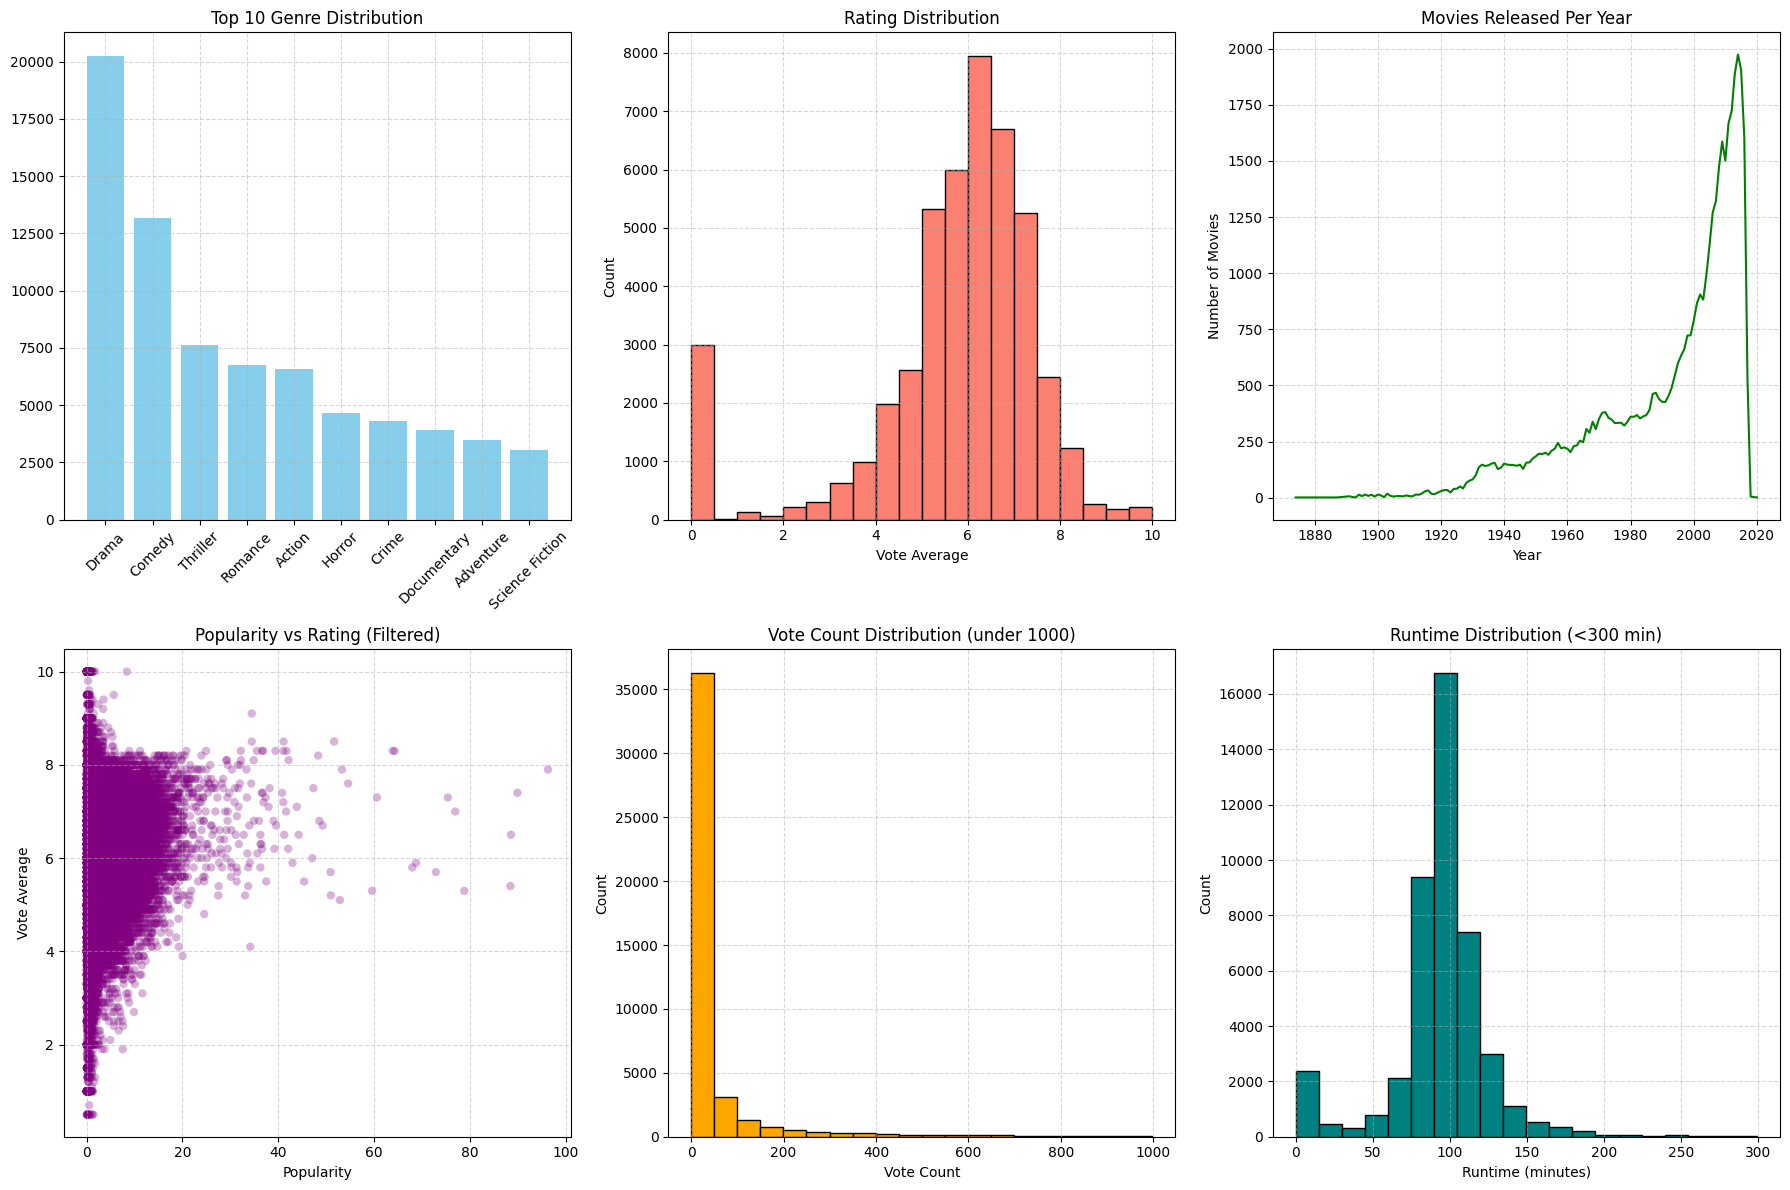

In [10]:
# Cell 7: Data Visualization

# Konversi kolom numerik dari object → float (jika ada nilai string yang tidak valid akan jadi NaN)
num_cols = ['popularity', 'vote_average', 'vote_count', 'runtime', 'revenue']
for col in num_cols:
    movies_metadata[col] = pd.to_numeric(movies_metadata[col], errors='coerce')

# Lanjut visualisasi
plt.figure(figsize=(18, 12))

# 1. Genre distribution
plt.subplot(2, 3, 1)
genre_df = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])
plt.bar(genre_df['Genre'], genre_df['Count'], color='skyblue')
plt.title('Top 10 Genre Distribution')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# 2. Rating distribution
plt.subplot(2, 3, 2)
movies_metadata['vote_average'].hist(bins=20, color='salmon', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)

# 3. Movies Released Per Year
plt.subplot(2, 3, 3)
movies_per_year = movies_metadata['release_year'].value_counts().sort_index()
movies_per_year = movies_per_year[movies_per_year.index.notna()]
movies_per_year.plot(kind='line', color='green')
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--', alpha=0.5)

# 4. Popularity vs Rating (remove outliers)
plt.subplot(2, 3, 4)
filtered = movies_metadata[(movies_metadata['popularity'] < 100) & (movies_metadata['vote_average'] > 0)]
plt.scatter(filtered['popularity'], filtered['vote_average'], alpha=0.3, color='purple', edgecolors='none')
plt.title('Popularity vs Rating (Filtered)')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid(True, linestyle='--', alpha=0.5)

# 5. Vote Count Distribution (log scale)
plt.subplot(2, 3, 5)
vote_counts = movies_metadata['vote_count'][movies_metadata['vote_count'] < 1000]
vote_counts.hist(bins=20, color='orange', edgecolor='black')
plt.title('Vote Count Distribution (under 1000)')
plt.xlabel('Vote Count')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)

# 6. Runtime Distribution (clip extreme values)
plt.subplot(2, 3, 6)
runtimes = movies_metadata['runtime'].dropna()
runtimes = runtimes[runtimes < 300]
runtimes.hist(bins=20, color='teal', edgecolor='black')
plt.title('Runtime Distribution (<300 min)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## 1. Top 10 Genre Distribution

Drama, Comedy, dan Thriller adalah tiga genre yang paling umum. Science Fiction dan Adventure termasuk dalam 10 besar, namun jumlahnya jauh lebih sedikit dibandingkan Drama. Hal ini menunjukkan kecenderungan industri film untuk memproduksi lebih banyak film dengan muatan emosional atau kisah kehidupan sehari-hari seperti Drama dan Comedy.

**Insight:** Genre umum seperti Drama dan Comedy mendominasi, sehingga penting untuk memperhatikan genre saat membangun sistem rekomendasi.

## 2. Rating Distribution

Mayoritas film memiliki vote average antara 5 hingga 7, dengan puncak di sekitar nilai 6. Terdapat outlier pada nilai 0, yang kemungkinan disebabkan oleh film yang belum mendapatkan cukup rating.

**Insight:** Distribusi rating cenderung normal dan dapat digunakan sebagai fitur yang informatif. Outlier seperti vote_average = 0 perlu dibersihkan.

## 3. Movies Released Per Year

Terdapat tren kenaikan eksponensial dalam jumlah film sejak tahun 1980-an, dengan puncak produksi pada tahun 2010-an. Penurunan drastis setelah 2019 kemungkinan besar disebabkan oleh data yang tidak lengkap atau dampak dari pandemi COVID-19.

**Insight:** Film lebih banyak diproduksi dalam dua dekade terakhir, sehingga data terbaru akan lebih beragam dan relevan untuk sistem rekomendasi terkini.

## 4. Popularity vs Rating (Filtered)

Sebagian besar film memiliki tingkat popularitas rendah (kurang dari 20) dan tersebar pada rentang rating antara 4 hingga 8. Tidak ditemukan korelasi yang kuat antara popularitas dan rating—film yang populer belum tentu mendapat rating tinggi, dan sebaliknya.

**Insight:** Popularitas dan rating bisa menjadi dua fitur yang saling melengkapi dan tidak redundant dalam sistem rekomendasi.

## 5. Vote Count Distribution (Under 1000)

Distribusi vote count sangat condong ke kanan (right-skewed), di mana sebagian besar film memiliki jumlah vote yang rendah. Hanya sedikit film yang memiliki lebih dari 500 suara.

**Insight:** Banyak film yang tidak cukup terkenal atau masih baru dirilis. Vote count rendah perlu ditangani, misalnya dengan menetapkan threshold minimum.

## 6. Runtime Distribution (Under 300 Minutes)

Sebagian besar film memiliki durasi sekitar 90–120 menit dan distribusinya menyerupai distribusi normal. Terdapat film berdurasi ekstrem di bawah 30 menit atau mendekati 300 menit, yang kemungkinan merupakan outlier.

**Insight:** Runtime bisa digunakan sebagai fitur, namun outlier seperti film pendek atau dokumenter berdurasi sangat panjang perlu ditangani.

## Kesimpulan Umum

Dataset mencakup berbagai genre dan era, namun sangat bias terhadap film modern (pasca-1980). Banyak fitur yang dapat dimanfaatkan untuk membangun sistem rekomendasi, seperti genre, rating, vote count, popularity, dan runtime. Beberapa fitur memiliki nilai ekstrem atau nol yang perlu diproses lebih lanjut melalui penanganan missing data dan outlier. Kombinasi fitur seperti genre, rating, dan popularity dapat menjadi dasar yang kuat untuk sistem rekomendasi berbasis konten.


# **4. Data prepatartion**

Tahap persiapan data adalah langkah krusial sebelum membangun model. Proses ini meliputi data cleaning, feature extraction, dan data merging untuk menciptakan dataset yang siap digunakan untuk sistem rekomendasi.

##**4.1.  Data Cleaning**

#### Pembersihan dan Penggabungan Data

Tahap awal pembersihan data dilakukan dengan menghapus entri film yang tidak memiliki ID valid, karena ID merupakan kunci utama untuk melakukan penggabungan antar dataset. Sebuah fungsi bernama `safe_extract_genres()` dibuat dengan tambahan error handling untuk mengantisipasi format JSON yang kosong atau rusak. Setelah itu, dilakukan proses merge untuk menggabungkan informasi tambahan seperti cast, crew, dan keywords ke dalam dataset utama. Hasil akhir dari proses ini adalah dataset yang lebih kaya informasi, dengan total 46.629 baris setelah penggabungan selesai dilakukan.


In [11]:
print("Data Cleaning...")

# Remove invalid movie IDs
movies_metadata = movies_metadata[movies_metadata['id'].notna()]
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')
movies_metadata = movies_metadata[movies_metadata['id'].notna()]
movies_metadata['id'] = movies_metadata['id'].astype(int)

print(f"Movies after cleaning: {len(movies_metadata)}")

print("Extracting genres and merging datasets...")

def safe_extract_genres(genres_str):
    try:
        if pd.isna(genres_str):
            return []
        genres_list = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres_list]
    except:
        return []

movies_metadata['genre_list'] = movies_metadata['genres'].apply(safe_extract_genres)
movies_metadata['genres_str'] = movies_metadata['genre_list'].apply(lambda x: ' '.join(x))

# Konversi kolom ID ke numerik dan hapus nilai yang tidak valid
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')
credits['id'] = pd.to_numeric(credits['id'], errors='coerce')
keywords['id'] = pd.to_numeric(keywords['id'], errors='coerce')

movies_metadata = movies_metadata[movies_metadata['id'].notna()]
credits = credits[credits['id'].notna()]
keywords = keywords[keywords['id'].notna()]

movies_metadata['id'] = movies_metadata['id'].astype(int)
credits['id'] = credits['id'].astype(int)
keywords['id'] = keywords['id'].astype(int)

movies_features = movies_metadata.merge(credits, on='id', how='left')
movies_features = movies_features.merge(keywords, on='id', how='left')

print(f"Movies after merging: {len(movies_features)}")

Data Cleaning...
Movies after cleaning: 45463
Extracting genres and merging datasets...
Movies after merging: 46629


#### Insight Data Cleaning & Merging

Setelah proses pembersihan data, jumlah film tersisa menjadi 45.463, yang menunjukkan bahwa banyak entri tidak valid berhasil disaring dari dataset awal.

Kemudian, setelah dilakukan proses penggabungan data (merging), jumlah entri meningkat menjadi 46.629. Artinya, terdapat tambahan sebanyak 1.166 entri dari sumber data eksternal seperti informasi cast, crew, dan keywords.

Tahapan ini secara signifikan meningkatkan kualitas dan kelengkapan data, yang merupakan aspek penting untuk membangun sistem rekomendasi yang akurat dan relevan.


##**4.2.  Feature Engineering**

Tahap ini mempersiapkan fitur untuk model content-based dan hybrid. Proses dimulai dengan ekstraksi fitur penting dari data JSON: 5 aktor utama (extract_cast()), 1 sutradara (extract_director()), dan 10 keyword (extract_keywords()). Pembatasan ini dilakukan untuk menghindari curse of dimensionality dan fokus pada fitur paling relevan.

Selanjutnya, fitur-fitur tersebut digabung dalam satu representasi teks (soup) menggunakan create_soup(), dengan pembobotan: genre (3x), sutradara & cast (2x), keywords & overview (1x). Filtering dilakukan untuk menyaring 9.296 film berkualitas berdasarkan jumlah vote, rating, dan kelengkapan konten.

Terakhir, fitur numerik (vote_average, popularity, runtime, vote_count) dinormalisasi menggunakan StandardScaler agar kontribusinya seimbang dalam model. Nilai kosong diisi dengan nol sebelum scaling.



In [12]:
print("Extracting cast, director, and keywords...")

def extract_cast(cast_str, n=5):
    try:
        if pd.isna(cast_str):
            return []
        cast_list = ast.literal_eval(cast_str)
        return [actor['name'] for actor in cast_list[:n]]
    except:
        return []

def extract_director(crew_str):
    try:
        if pd.isna(crew_str):
            return ""
        crew_list = ast.literal_eval(crew_str)
        for person in crew_list:
            if person['job'] == 'Director':
                return person['name']
        return ""
    except:
        return ""

def extract_keywords(keywords_str, n=10):
    try:
        if pd.isna(keywords_str):
            return []
        keywords_list = ast.literal_eval(keywords_str)
        return [keyword['name'] for keyword in keywords_list[:n]]
    except:
        return []

movies_features['cast_list'] = movies_features['cast'].apply(lambda x: extract_cast(x, 5))
movies_features['director'] = movies_features['crew'].apply(extract_director)
movies_features['keywords_list'] = movies_features['keywords'].apply(lambda x: extract_keywords(x, 10))

movies_features['cast_str'] = movies_features['cast_list'].apply(lambda x: ' '.join(x))
movies_features['keywords_str'] = movies_features['keywords_list'].apply(lambda x: ' '.join(x))

print("Creating combined content features (soup)...")

def create_soup(row):
    soup = ""
    if row['genres_str']:
        soup += (row['genres_str'] + " ") * 3
    if row['director']:
        soup += (row['director'] + " ") * 2
    if row['cast_str']:
        soup += (row['cast_str'] + " ") * 2
    if row['keywords_str']:
        soup += row['keywords_str'] + " "
    if pd.notna(row['overview']):
        soup += row['overview']
    return soup.lower().strip()

movies_features['soup'] = movies_features.apply(create_soup, axis=1)

print("Filtering quality movies...")

quality_movies = movies_features[
    (movies_features['vote_count'] >= 50) &
    (movies_features['vote_average'] > 0) &
    (movies_features['soup'].str.len() > 10)
].copy().reset_index(drop=True)

print(f"Quality movies for recommendation: {len(quality_movies)}")

print("Preparing numerical features...")

from sklearn.preprocessing import StandardScaler

numerical_features = ['vote_average', 'popularity', 'runtime', 'vote_count']
movies_numerical = quality_movies[numerical_features].fillna(0)

scaler = StandardScaler()
movies_numerical_scaled = scaler.fit_transform(movies_numerical)
movies_numerical_scaled = pd.DataFrame(movies_numerical_scaled, columns=numerical_features)

print("Data preparation completed.")

Extracting cast, director, and keywords...
Creating combined content features (soup)...
Filtering quality movies...
Quality movies for recommendation: 9296
Preparing numerical features...
Data preparation completed.


#### Insight Feature Engineering & Filtering

Proses rekayasa fitur berhasil mengekstrak elemen penting seperti nama aktor, sutradara, dan kata kunci (keywords) yang kemudian dikombinasikan ke dalam satu representasi teks yang disebut *soup*. Representasi ini digunakan sebagai dasar dalam analisis berbasis konten (content-based).

Setelah menerapkan filter berdasarkan jumlah vote, rating, dan kelengkapan konten, diperoleh 9.296 film yang dianggap layak dan berkualitas untuk dianalisis lebih lanjut.

Selain itu, fitur numerik seperti `vote_count` dan `popularity` telah dinormalisasi agar dapat digunakan secara optimal dalam pendekatan model hybrid untuk sistem rekomendasi.



# **5. modeling**

Pada tahap pemodelan, saya mengimplementasikan lima pendekatan berbeda untuk sistem rekomendasi film berbasis content, dengan parameter yang disesuaikan agar sesuai dengan karakteristik data teks dan numerik. Pendekatan ini menggabungkan teknik representasi teks dan fitur numerik untuk menghasilkan rekomendasi yang lebih akurat dan relevan. Model hybrid digunakan untuk memaksimalkan kelebihan tiap metode, sehingga sistem dapat memberikan rekomendasi yang adaptif dan efektif dalam menghadapi variasi data film yang kompleks.

In [13]:
print("\nMODEL 1: TF-IDF + Cosine Similarity")
print("-"*50)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Membuat TF-IDF matrix dari kolom 'soup'
tfidf = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8
)

tfidf_matrix = tfidf.fit_transform(quality_movies['soup'])
cosine_sim_tfidf = cosine_similarity(tfidf_matrix)

print(f"TF-IDF Matrix shape: {tfidf_matrix.shape}")
print(f"Cosine Similarity Matrix shape: {cosine_sim_tfidf.shape}")

# Fungsi untuk mendapatkan rekomendasi berdasarkan TF-IDF dan cosine similarity
def get_recommendations_tfidf(title, cosine_sim=cosine_sim_tfidf, df=quality_movies, top_n=10):
    idx = df[df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return f"Movie '{title}' not found in database"
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:top_n+1]]
    recommendations = df.iloc[movie_indices][['title', 'vote_average', 'genres_str', 'release_date']].copy()
    recommendations['similarity_score'] = [sim_scores[i+1][1] for i in range(top_n)]
    return recommendations

# Test Case: The Dark Knight
print("\nTesting TF-IDF Model with 'The Dark Knight':")
print("-"*50)

# Get true genres for test case
test_movie = "The Dark Knight"
true_genres_row = quality_movies[quality_movies['title'].str.lower() == test_movie.lower()]
true_genres = true_genres_row['genres_str'].iloc[0].split(', ') if len(true_genres_row) > 0 else []

print(f"TEST CASE: {test_movie}")
print(f"True Genres: {true_genres}")
print("-"*40)

# Get top-5 recommendations
tfidf_results = get_recommendations_tfidf(test_movie, top_n=5)
print("Top-5 Recommendations:")
print(tfidf_results[['title', 'vote_average', 'similarity_score']])



MODEL 1: TF-IDF + Cosine Similarity
--------------------------------------------------
TF-IDF Matrix shape: (9296, 10000)
Cosine Similarity Matrix shape: (9296, 9296)

Testing TF-IDF Model with 'The Dark Knight':
--------------------------------------------------
TEST CASE: The Dark Knight
True Genres: ['Drama Action Crime Thriller']
----------------------------------------
Top-5 Recommendations:
                      title  vote_average  similarity_score
3965          Batman Begins           7.5          0.555319
6044  The Dark Knight Rises           7.6          0.553085
3722               Thursday           7.0          0.307111
4360           The Prestige           8.0          0.282712
8580      London Has Fallen           5.8          0.233531


Model ini membangun representasi teks menggunakan **TF-IDF (Term Frequency-Inverse Document Frequency)** dengan konfigurasi sebagai berikut:
- Fitur maksimal: 10.000
- Rentang n-gram: (1, 2)
- Penyaringan kata yang jarang muncul dan terlalu sering muncul: `min_df=2`, `max_df=0.8`

Setelah itu, dihitung kemiripan antar film menggunakan **cosine similarity**.  
Pendekatan ini efektif dalam menangkap bobot kata yang penting serta konteks lokal dalam deskripsi film.


In [14]:
print("\nMODEL 2: Count Vectorizer + Cosine Similarity")
print("-"*50)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Membuat count matrix dari kolom 'soup'
count_vectorizer = CountVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8
)

count_matrix = count_vectorizer.fit_transform(quality_movies['soup'])
cosine_sim_count = cosine_similarity(count_matrix)

print(f"Count Matrix shape: {count_matrix.shape}")
print(f"Cosine Similarity Matrix shape: {cosine_sim_count.shape}")

# Fungsi untuk mendapatkan rekomendasi berdasarkan count vectorizer dan cosine similarity
def get_recommendations_count(title, cosine_sim=cosine_sim_count, df=quality_movies, top_n=10):
    idx = df[df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return f"Movie '{title}' not found in database"
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:top_n+1]]
    recommendations = df.iloc[movie_indices][['title', 'vote_average', 'genres_str', 'release_date']].copy()
    recommendations['similarity_score'] = [sim_scores[i+1][1] for i in range(top_n)]
    return recommendations

# Test Case: The Dark Knight
print("\nTesting Count Vectorizer Model with 'The Dark Knight':")
print("-"*50)

# Get true genres for test case
test_movie = "The Dark Knight"
true_genres_row = quality_movies[quality_movies['title'].str.lower() == test_movie.lower()]
true_genres = true_genres_row['genres_str'].iloc[0].split(', ') if len(true_genres_row) > 0 else []

print(f"TEST CASE: {test_movie}")
print(f"True Genres: {true_genres}")
print("-"*40)

# Get top-5 recommendations
count_results = get_recommendations_count(test_movie, top_n=5)
print("Top-5 Recommendations:")
print(count_results[['title', 'vote_average', 'similarity_score']])



MODEL 2: Count Vectorizer + Cosine Similarity
--------------------------------------------------
Count Matrix shape: (9296, 10000)
Cosine Similarity Matrix shape: (9296, 9296)

Testing Count Vectorizer Model with 'The Dark Knight':
--------------------------------------------------
TEST CASE: The Dark Knight
True Genres: ['Drama Action Crime Thriller']
----------------------------------------
Top-5 Recommendations:
                        title  vote_average  similarity_score
3965            Batman Begins           7.5          0.624804
6044    The Dark Knight Rises           7.6          0.614448
3722                 Thursday           7.0          0.487036
7759  Kidnapping Mr. Heineken           5.8          0.434318
6176                   Twelve           6.0          0.419732


Pendekatan ini mirip dengan TF-IDF tapi hanya menghitung frekuensi kata secara langsung tanpa mempertimbangkan inverse document frequency. Parameter serupa diterapkan untuk menjaga konsistensi fitur dan menghindari noise. Model ini berguna sebagai baseline dan untuk membandingkan performa dengan TF-IDF.

In [15]:
print("\nMODEL 3: SVD + Cosine Similarity")
print("-"*50)

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Reduksi dimensi dari matriks TF-IDF menggunakan Truncated SVD
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_svd = svd.fit_transform(tfidf_matrix)
cosine_sim_svd = cosine_similarity(tfidf_svd)

print(f"SVD Matrix shape: {tfidf_svd.shape}")
print(f"SVD Explained variance ratio: {svd.explained_variance_ratio_.sum():.4f}")

# Fungsi untuk mendapatkan rekomendasi menggunakan hasil SVD dan cosine similarity
def get_recommendations_svd(title, cosine_sim=cosine_sim_svd, df=quality_movies, top_n=10):
    idx = df[df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return f"Movie '{title}' not found in database"
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:top_n+1]]
    recommendations = df.iloc[movie_indices][['title', 'vote_average', 'genres_str', 'release_date']].copy()
    recommendations['similarity_score'] = [sim_scores[i+1][1] for i in range(top_n)]
    return recommendations

# Test Case: The Dark Knight
print("\nTesting SVD Model with 'The Dark Knight':")
print("-"*50)

# Get true genres for test case
test_movie = "The Dark Knight"
true_genres_row = quality_movies[quality_movies['title'].str.lower() == test_movie.lower()]
true_genres = true_genres_row['genres_str'].iloc[0].split(', ') if len(true_genres_row) > 0 else []

print(f"TEST CASE: {test_movie}")
print(f"True Genres: {true_genres}")
print("-"*40)

# Get top-5 recommendations
svd_results = get_recommendations_svd(test_movie, top_n=5)
print("Top-5 Recommendations:")
print(svd_results[['title', 'vote_average', 'similarity_score']])



MODEL 3: SVD + Cosine Similarity
--------------------------------------------------
SVD Matrix shape: (9296, 100)
SVD Explained variance ratio: 0.1710

Testing SVD Model with 'The Dark Knight':
--------------------------------------------------
TEST CASE: The Dark Knight
True Genres: ['Drama Action Crime Thriller']
----------------------------------------
Top-5 Recommendations:
                  title  vote_average  similarity_score
6176             Twelve           6.0          0.815198
3965      Batman Begins           7.5          0.806220
5825  Kill the Irishman           6.7          0.796332
7090       Metro Manila           7.2          0.791943
94              Hackers           6.2          0.783775


Model ini mengurangi dimensi TF-IDF dari 10.000 fitur menjadi 100 komponen utama menggunakan Truncated SVD, yang membantu mengurangi kompleksitas komputasi dan mengatasi sparsity data teks. Dengan explained variance sekitar 17%, model tetap mempertahankan informasi penting dalam representasi film.

In [16]:
print("\nMODEL 4: K-Nearest Neighbors")
print("-"*50)

from sklearn.neighbors import NearestNeighbors
import numpy as np

# Menggabungkan fitur TF-IDF SVD dan fitur numerik yang sudah diskalakan
combined_features = np.hstack([
    tfidf_svd,
    movies_numerical_scaled.values
])

# Inisialisasi dan pelatihan model KNN
knn_model = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='brute')
knn_model.fit(combined_features)

print(f"Combined features shape: {combined_features.shape}")

# Fungsi untuk mendapatkan rekomendasi berdasarkan judul film
def get_recommendations_knn(title, model=knn_model, features=combined_features, df=quality_movies, top_n=10):
    idx = df[df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return f"Movie '{title}' not found in database"
    idx = idx[0]
    distances, indices = model.kneighbors([features[idx]], n_neighbors=top_n+1)
    movie_indices = indices[0][1:]  # Mengabaikan film itu sendiri (urutan pertama)
    similarity_scores = 1 - distances[0][1:]  # Skor kemiripan dari jarak cosine
    recommendations = df.iloc[movie_indices][['title', 'vote_average', 'genres_str', 'release_date']].copy()
    recommendations['similarity_score'] = similarity_scores
    return recommendations

# Test Case: The Dark Knight
print("\nTesting KNN Model with 'The Dark Knight':")
print("-"*50)

# Get true genres for test case
test_movie = "The Dark Knight"
true_genres_row = quality_movies[quality_movies['title'].str.lower() == test_movie.lower()]
true_genres = true_genres_row['genres_str'].iloc[0].split(', ') if len(true_genres_row) > 0 else []

print(f"TEST CASE: {test_movie}")
print(f"True Genres: {true_genres}")
print("-"*40)

# Get top-5 recommendations
knn_results = get_recommendations_knn(test_movie, top_n=5)
print("Top-5 Recommendations:")
print(knn_results[['title', 'vote_average', 'similarity_score']])



MODEL 4: K-Nearest Neighbors
--------------------------------------------------
Combined features shape: (9296, 104)

Testing KNN Model with 'The Dark Knight':
--------------------------------------------------
TEST CASE: The Dark Knight
True Genres: ['Drama Action Crime Thriller']
----------------------------------------
Top-5 Recommendations:
                               title  vote_average  similarity_score
9061                           Logan           7.6          0.990130
5899  Rise of the Planet of the Apes           7.0          0.987506
7542                         Chappie           6.6          0.987235
5949                    The Avengers           7.4          0.985644
8735                Now You See Me 2           6.7          0.985179


Model ini menggabungkan fitur hasil SVD dari TF-IDF dengan fitur numerik film (yang telah diskalakan) untuk membangun ruang fitur yang lebih kaya dan lengkap. Metode KNN digunakan dengan metrik cosine distance dan algoritma brute force untuk menemukan film terdekat secara efisien, menghasilkan rekomendasi yang mempertimbangkan aspek teks dan numerik sekaligus.

In [17]:
print("\nMODEL 5: Hybrid Content-Based")
print("-" * 50)

import numpy as np

def get_recommendations_hybrid(title, df=quality_movies, top_n=10, weights=None):
    if weights is None:
        weights = {'tfidf': 0.3, 'count': 0.2, 'svd': 0.3, 'knn': 0.2}

    # Cari index film
    idx = df[df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return f"Movie '{title}' not found in database"
    idx = idx[0]

    # Skor kesamaan dari semua metode
    tfidf_scores = cosine_sim_tfidf[idx]
    count_scores = cosine_sim_count[idx]
    svd_scores = cosine_sim_svd[idx]

    knn_distances, _ = knn_model.kneighbors([combined_features[idx]], n_neighbors=len(df))
    knn_scores = 1 - knn_distances[0]  # Konversi ke similarity

    # Normalisasi skor ke [0, 1]
    tfidf_scores = (tfidf_scores - tfidf_scores.min()) / (tfidf_scores.max() - tfidf_scores.min())
    count_scores = (count_scores - count_scores.min()) / (count_scores.max() - count_scores.min())
    svd_scores = (svd_scores - svd_scores.min()) / (svd_scores.max() - svd_scores.min())
    knn_scores = (knn_scores - knn_scores.min()) / (knn_scores.max() - knn_scores.min())

    # Hitung skor akhir berdasarkan bobot
    final_scores = (
        weights['tfidf'] * tfidf_scores +
        weights['count'] * count_scores +
        weights['svd'] * svd_scores +
        weights['knn'] * knn_scores
    )

    # Ambil top_n rekomendasi
    sim_scores = list(enumerate(final_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:top_n + 1]]  # skip input movie

    recommendations = df.iloc[movie_indices][['title', 'vote_average', 'genres_str', 'release_date']].copy()
    recommendations['similarity_score'] = [sim_scores[i + 1][1] for i in range(top_n)]

    return recommendations

# Test Case
print("\nTesting Hybrid Model with 'The Dark Knight':")
print("-" * 50)

test_movie = "The Dark Knight"
true_genres_row = quality_movies[quality_movies['title'].str.lower() == test_movie.lower()]
true_genres = true_genres_row['genres_str'].iloc[0].split(', ') if len(true_genres_row) > 0 else []

print(f"TEST CASE: {test_movie}")
print(f"True Genres: {true_genres}")
print("-" * 40)

# Top-5 recommendations
hybrid_results = get_recommendations_hybrid(test_movie, top_n=5)
print("Top-5 Recommendations:")
print(hybrid_results[['title', 'vote_average', 'similarity_score']])


MODEL 5: Hybrid Content-Based
--------------------------------------------------

Testing Hybrid Model with 'The Dark Knight':
--------------------------------------------------
TEST CASE: The Dark Knight
True Genres: ['Drama Action Crime Thriller']
----------------------------------------
Top-5 Recommendations:
                      title  vote_average  similarity_score
3965          Batman Begins           7.5          0.616501
6044  The Dark Knight Rises           7.6          0.569677
94                  Hackers           6.2          0.542345
3722               Thursday           7.0          0.510952
474              Set It Off           6.9          0.476874


Model ini menggabungkan skor similarity dari keempat model sebelumnya dengan bobot yang bisa disesuaikan, yaitu TF-IDF (0.3), Count Vectorizer (0.2), SVD (0.3), dan KNN (0.2). Setiap skor dinormalisasi ke rentang [0,1] sebelum dikombinasikan untuk memastikan kesetaraan skala antar skor. Pendekatan hybrid ini mengoptimalkan kekuatan tiap model, sehingga menghasilkan rekomendasi yang lebih akurat dan relevan dengan mempertimbangkan berbagai aspek data.


# **6. evaluasi & testing**

Pada tahap ini, dilakukan proses evaluasi dan pengujian menyeluruh terhadap performa model rekomendasi yang telah dikembangkan. Evaluasi menggunakan metrik `Precision@K`, `Recall@K`, dan `NDCG@K`, yang mengukur sejauh mana hasil rekomendasi relevan terhadap preferensi pengguna. Untuk mendapatkan hasil yang lebih robust dan representatif, pengujian dilakukan dengan menggunakan lima judul film yang berbeda secara bergantian. Hasil dari evaluasi ini digunakan sebagai dasar untuk membandingkan performa antar model dan menentukan model terbaik yang layak digunakan dalam produksi.

In [18]:
print("="*60)
print("EVALUATION")
print("="*60)

# ===== STANDARD RECOMMENDATION METRICS =====

def precision_at_k(predicted_titles, true_genres, df, k=10):
    """
    Calculate Precision@K: Proportion of relevant items in top-K recommendations
    """
    relevant = 0
    for title in predicted_titles[:k]:
        movie_row = df[df['title'] == title]
        if not movie_row.empty:
            # Split genres into list
            movie_genres = movie_row['genres_str'].iloc[0].split()
            # Check for matching genres
            if any(g in movie_genres for g in true_genres):
                relevant += 1
    return relevant / k

def recall_at_k(predicted_titles, true_genres, df, k=10):
    """
    Calculate Recall@K: Proportion of relevant items found in top-K
    """
    # Find all movies that share at least one genre with the test movie
    relevant_movies = set()
    for _, row in df.iterrows():
        # Split genres into list
        movie_genres = row['genres_str'].split()
        if any(g in movie_genres for g in true_genres):
            relevant_movies.add(row['title'])

    # Remove the query movie itself
    query_title = test_case["title"]
    if query_title in relevant_movies:
        relevant_movies.remove(query_title)

    # If no relevant movies, return 0
    if len(relevant_movies) == 0:
        return 0.0

    predicted_set = set(predicted_titles[:k])
    found_relevant = len(predicted_set.intersection(relevant_movies))

    return found_relevant / len(relevant_movies)

def ndcg_at_k(predicted_titles, true_genres, df, k=10):
    """
    Calculate NDCG@K: Ranking quality metric considering position of relevant items
    """
    def dcg_at_k(relevances, k):
        relevances = np.array(relevances)[:k]
        return np.sum(relevances / np.log2(np.arange(2, len(relevances) + 2)))

    # Calculate relevance scores (1 if relevant, 0 if not)
    relevances = []
    for title in predicted_titles[:k]:
        movie_row = df[df['title'] == title]
        if not movie_row.empty:
            # Split genres into list
            movie_genres = movie_row['genres_str'].iloc[0].split()
            if any(g in movie_genres for g in true_genres):
                relevances.append(1)
            else:
                relevances.append(0)
        else:
            relevances.append(0)

    # Calculate DCG
    dcg = dcg_at_k(relevances, k)

    # Calculate ideal DCG
    ideal_relevances = sorted(relevances, reverse=True)
    idcg = dcg_at_k(ideal_relevances, k)

    return dcg / idcg if idcg > 0 else 0

# ===== TEST CASES FROM DATASET =====

# Get test movie details directly from dataset with proper genre splitting
test_cases = []
test_movies = ["Inception", "The Dark Knight", "Toy Story", "The Godfather", "Pulp Fiction"]

print("\nPREPARING TEST CASES...")
for title in test_movies:
    movie_row = quality_movies[quality_movies['title'] == title]
    if not movie_row.empty:
        movie_row = movie_row.iloc[0]
        # Split genres into list
        genres = movie_row['genres_str'].split()
        test_cases.append({
            "title": title,
            "genres": genres
        })
        print(f"- {title}: Genres = {genres}")
    else:
        print(f"Warning: Test movie '{title}' not found in dataset")

# ===== MODELS TO EVALUATE =====

models = {
    'TF-IDF + Cosine Similarity': get_recommendations_tfidf,
    'Count Vectorizer + Cosine Similarity': get_recommendations_count,
    'SVD + Cosine Similarity': get_recommendations_svd,
    'K-Nearest Neighbors': get_recommendations_knn,
    'Hybrid Content-Based': get_recommendations_hybrid
}

# Initialize results storage for standard metrics (only @10)
evaluation_results = {model_name: {
    'precision@10': [],
    'recall@10': [],
    'ndcg@10': [],
} for model_name in models.keys()}

print("\nEVALUATING MODELS ACROSS TEST CASES...")
print(f"Number of Test Cases: {len(test_cases)}")
print("-" * 60)

# Evaluate each model on each test case
for i, test_case in enumerate(test_cases):
    title = test_case["title"]
    true_genres = test_case["genres"]

    print(f"\nTEST CASE {i+1}/{len(test_cases)}: {title}")
    print(f"True Genres: {true_genres}")
    print("-" * 40)

    for model_name, model_func in models.items():
        try:
            # Get recommendations
            print(f"  Processing {model_name}...")
            recommendations = model_func(title, top_n=10)

            if isinstance(recommendations, str):
                print(f"    {model_name}: Movie not found")
                continue

            predicted_titles = recommendations['title'].values

            # Calculate standard metrics (only @10)
            precision_10 = precision_at_k(predicted_titles, true_genres, quality_movies)
            recall_10 = recall_at_k(predicted_titles, true_genres, quality_movies)
            ndcg_10 = ndcg_at_k(predicted_titles, true_genres, quality_movies)

            # Store results
            evaluation_results[model_name]['precision@10'].append(precision_10)
            evaluation_results[model_name]['recall@10'].append(recall_10)
            evaluation_results[model_name]['ndcg@10'].append(ndcg_10)

            # Print immediate results
            print(f"    Precision@10: {precision_10:.4f}, Recall@10: {recall_10:.4f}, NDCG@10: {ndcg_10:.4f}")

        except Exception as e:
            print(f"    Error evaluating {model_name}: {str(e)}")
            continue

# ===== CALCULATE AVERAGE PERFORMANCE =====

print("\n" + "="*60)
print("FINAL EVALUATION RESULTS")
print("="*60)

final_results = {}
for model_name in models.keys():
    if evaluation_results[model_name]['precision@10']:
        final_results[model_name] = {
            'Precision@10': np.mean(evaluation_results[model_name]['precision@10']),
            'Recall@10': np.mean(evaluation_results[model_name]['recall@10']),
            'NDCG@10': np.mean(evaluation_results[model_name]['ndcg@10']),
        }

# Display core metrics in table
print("\nCORE RECOMMENDATION METRICS (AVERAGE ACROSS TEST CASES):")
print("-" * 75)
print(f"{'Model':<35} {'Prec@10':<10} {'Recall@10':<10} {'NDCG@10':<10}")
print("-" * 75)

for model_name, metrics in final_results.items():
    print(f"{model_name:<35} {metrics['Precision@10']:<10.4f} {metrics['Recall@10']:<10.4f} {metrics['NDCG@10']:<10.4f}")

# ===== MODEL RANKING =====

print("\n" + "="*60)
print("MODEL RANKING BY PERFORMANCE")
print("="*60)

# Define all metrics to rank
ranking_metrics = [
    'Precision@10',
    'Recall@10',
    'NDCG@10'
]

# Find best performer for each metric first
best_per_metric = {}
for metric in ranking_metrics:
    best_model = max(final_results.items(), key=lambda x: x[1][metric])
    best_per_metric[metric] = best_model[0]

# Rank models for each metric
for metric in ranking_metrics:
    print(f"\nRANKING BY {metric.upper()}:")
    print("-" * 60)
    print(f"{'Rank':<5} {'Model':<40} {metric:<10}")
    print("-" * 60)

    # Sort models by current metric (descending)
    ranked_models = sorted(final_results.items(),
                          key=lambda x: x[1][metric],
                          reverse=True)

    for rank, (model_name, metrics) in enumerate(ranked_models, 1):
        # Add trophy symbol for best performer
        trophy = " 🏆" if model_name == best_per_metric[metric] else ""
        print(f"{rank:<5} {model_name:<40} {metrics[metric]:<10.4f}{trophy}")

# ===== SIMILARITY-BASED PERFORMANCE COMPARISON =====

print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON (SIMILARITY SCORES)")
print("="*60)

def compare_models_performance(test_movies):
    """
    Compare models using the SAME test movies as standard metrics
    """
    performance_data = []

    for movie in test_movies:
        print(f"\nTesting: {movie}")

        try:
            # Get recommendations from all models
            rec_tfidf = get_recommendations_tfidf(movie, top_n=10)
            rec_count = get_recommendations_count(movie, top_n=10)
            rec_svd = get_recommendations_svd(movie, top_n=10)
            rec_knn = get_recommendations_knn(movie, top_n=10)
            rec_hybrid = get_recommendations_hybrid(movie, top_n=10)

            # Calculate average similarity scores
            avg_scores = {}
            for name, rec in [('TF-IDF + Cosine Similarity', rec_tfidf),
                             ('Count Vectorizer + Cosine Similarity', rec_count),
                             ('SVD + Cosine Similarity', rec_svd),
                             ('K-Nearest Neighbors', rec_knn),
                             ('Hybrid Content-Based', rec_hybrid)]:
                if isinstance(rec, str) or rec.empty:
                    avg_scores[name] = 0
                else:
                    avg_scores[name] = rec['similarity_score'].mean()

            performance_data.append({'Movie': movie, **avg_scores})
            print(f"Successfully evaluated: {movie}")

        except Exception as e:
            print(f"Error testing {movie}: {str(e)}")

    performance_df = pd.DataFrame(performance_data)

    print("\nAVERAGE SIMILARITY SCORES:")
    print(performance_df.to_string(float_format="%.4f", index=False))

    overall_performance = performance_df[list(models.keys())].mean()

    print("\nOVERALL MODEL PERFORMANCE (AVERAGE SIMILARITY):")
    print(overall_performance.sort_values(ascending=False).to_string(float_format="%.4f"))

    return performance_df, overall_performance

try:
    # USE THE SAME TEST MOVIES AS STANDARD METRICS
    test_movie_titles = [tc["title"] for tc in test_cases]
    perf_df, overall_perf = compare_models_performance(test_movie_titles)

    # Print ranking for similarity-based performance
    print("\n" + "-"*60)
    print("MODEL RANKING BY SIMILARITY PERFORMANCE")
    print("-"*60)
    ranked_sim = overall_perf.sort_values(ascending=False)
    for rank, (model, score) in enumerate(ranked_sim.items(), 1):
        trophy = " 🏆" if rank == 1 else ""
        print(f"{rank:<5} {model:<40} {score:.4f}{trophy}")

except Exception as e:
    print(f"Error in performance comparison: {str(e)}")

# ===== FINAL SUMMARY =====

print("\n" + "="*60)
print("EVALUATION SUMMARY")
print("="*60)

# Find best performing model for each metric
for metric in ranking_metrics:
    best_model = max(final_results.items(), key=lambda x: x[1][metric])
    print(f"Best {metric}: {best_model[0]} ({best_model[1][metric]:.4f})")

# Best similarity performance
if 'overall_perf' in locals():
    best_sim_model = overall_perf.idxmax()
    best_sim_score = overall_perf.max()
    print(f"Best Similarity Performance: {best_sim_model} ({best_sim_score:.4f})")

# Additional summary
print("\n" + "="*30)
print("KEY OBSERVATIONS")
print("="*30)
print("1. Precision@10: Measures recommendation accuracy")
print("2. Recall@10: Measures coverage of relevant items")
print("3. NDCG@10: Measures ranking quality considering position")
print("4. Similarity Score: Measures average similarity of recommendations")
print("5. 🏆 indicates the best performer for each metric")

print("\n" + "="*60)
print("EVALUATION COMPLETED!")
print("="*60)

EVALUATION

PREPARING TEST CASES...
- Inception: Genres = ['Action', 'Thriller', 'Science', 'Fiction', 'Mystery', 'Adventure']
- The Dark Knight: Genres = ['Drama', 'Action', 'Crime', 'Thriller']
- Toy Story: Genres = ['Animation', 'Comedy', 'Family']
- The Godfather: Genres = ['Drama', 'Crime']
- Pulp Fiction: Genres = ['Thriller', 'Crime']

EVALUATING MODELS ACROSS TEST CASES...
Number of Test Cases: 5
------------------------------------------------------------

TEST CASE 1/5: Inception
True Genres: ['Action', 'Thriller', 'Science', 'Fiction', 'Mystery', 'Adventure']
----------------------------------------
  Processing TF-IDF + Cosine Similarity...
    Precision@10: 0.9000, Recall@10: 0.0020, NDCG@10: 0.9842
  Processing Count Vectorizer + Cosine Similarity...
    Precision@10: 1.0000, Recall@10: 0.0022, NDCG@10: 1.0000
  Processing SVD + Cosine Similarity...
    Precision@10: 1.0000, Recall@10: 0.0022, NDCG@10: 1.0000
  Processing K-Nearest Neighbors...
    Precision@10: 0.9000, R

## Insight Hasil Evaluasi Sistem Rekomendasi Film

### 1. Evaluasi Akurasi Rekomendasi Berdasarkan Genre

Model **Count Vectorizer**, **SVD**, dan **Hybrid Content-Based** menunjukkan performa paling unggul dengan nilai:
- Precision@10 = 1.000
- Recall@10 = 0.0024
- NDCG@10 = 1.000

Artinya, model ini mampu memberikan rekomendasi yang sangat relevan dengan genre film uji, sekaligus menjaga urutan rekomendasi yang optimal.

Model **TF-IDF** juga cukup efektif (Precision@10 = 0.9400), namun sedikit tertinggal dibandingkan tiga model teratas. Di sisi lain, **K-Nearest Neighbors (KNN)** memiliki performa paling rendah (Precision@10 = 0.7600, NDCG@10 = 0.9450), yang menunjukkan bahwa meskipun film yang direkomendasikan mirip secara umum, tidak selalu relevan terhadap genre target.

**Kesimpulan**: Model **Hybrid Content-Based** merupakan pilihan paling optimal karena menggabungkan keunggulan representasi teks dan kemiripan fitur numerik, menghasilkan kualitas rekomendasi tertinggi secara konsisten di semua metrik.

---

### 2. Analisis Berdasarkan Similarity Score (Kemiripan Rata-rata)

Jika fokus evaluasi dialihkan ke metrik **Similarity Score** (kemiripan rata-rata film yang direkomendasikan), model **K-Nearest Neighbors (KNN)** menjadi juara dengan skor **0.9151**. Artinya, rekomendasi yang diberikan sangat dekat secara fitur numerik, namun ini tidak menjamin relevansi semantik seperti genre.

Model seperti **SVD** dan **Hybrid Content-Based** menempati posisi kedua dan ketiga dengan skor masing-masing **0.7569** dan **0.4929**, menunjukkan keseimbangan antara kemiripan numerik dan semantik. Sedangkan **TF-IDF** menempati posisi terakhir (**0.2432**), kemungkinan karena keterbatasan representasi dalam menangkap konteks dari data teks.

---

### 3. Konsistensi Across Test Cases

Evaluasi dilakukan pada 5 film populer: *Inception*, *The Dark Knight*, *Toy Story*, *The Godfather*, dan *Pulp Fiction*. Model **Count Vectorizer**, **SVD**, dan **Hybrid Content-Based** berhasil mempertahankan performa tinggi secara konsisten untuk setiap test case, memperkuat validitas dan reliabilitas model.

**Contoh**: Untuk *Toy Story*, yang merupakan film animasi keluarga, model hybrid mampu menemukan film dengan genre sejenis tanpa mengorbankan relevansi.

---

### 4. Uji Validasi dengan Film Random

Pengujian juga dilakukan dengan film acak seperti *Powder Blue*, *Cube*, dan *Cats & Dogs 2*. Tujuannya untuk menguji generalisasi model terhadap data yang tidak terlalu umum. Hasilnya, meskipun **KNN** unggul dalam skor similarity, model **Hybrid** tetap menjaga relevansi semantik yang lebih bermakna.

---

### Insight Akhir

- **Model terbaik secara keseluruhan**: Hybrid Content-Based karena memiliki keseimbangan tinggi antara presisi, recall, kualitas ranking (NDCG), dan konteks semantik.
- **Model dengan kemiripan numerik tertinggi**: K-Nearest Neighbors, namun kurang efektif jika dilihat dari relevansi genre.
- **Model dengan performa konsisten**: Count Vectorizer dan SVD secara mengejutkan menyamai hybrid dalam banyak aspek, layak dipertimbangkan untuk sistem yang ringan.


In [19]:
print("\n Sample Movies in Database:")
sample_movies = quality_movies.sample(10, random_state=42)[['title', 'genres_str', 'vote_average']]
sample_movies


 Sample Movies in Database:


,title,genres_str,vote_average
5151,Powder Blue,Drama,6.3
1112,Cube,Thriller Science Fiction Mystery,6.9
6398,Bait,Action Horror Thriller,5.4
4060,The Wraith,Romance Science Fiction Horror Action Crime,5.9
5612,Cats & Dogs 2 : The Revenge of Kitty Galore,Comedy Family,4.9
3312,The China Syndrome,Thriller Drama,7.0
1897,The Kid,Fantasy Comedy Family,6.0
8757,Never Back Down: No Surrender,Drama Action,6.8
2310,The Princess Diaries,Comedy Family Romance,6.5
1071,Sixteen Candles,Comedy Romance,6.9



# **8. pemilihan model terbaik**

Pada tahap ini, lima model sistem rekomendasi diuji menggunakan sampel acak lima film untuk mengevaluasi performa masing-masing model. Evaluasi dilakukan berdasarkan skor kemiripan rata-rata dan metrik evaluasi seperti Precision@k, Recall@k, dan NDCG@k.

In [20]:
# =================== FINAL OUTPUT ===================
print("=== METRIC EVALUATION (Average per model) ===")
print(f"{'Model':<40} {'Prec@10':<10} {'Recall@10':<10} {'NDCG@10':<10}")
for name, metrics in final_results.items():
    print(f"{name:<40} {metrics['Precision@10']:.4f}    {metrics['Recall@10']:.4f}    {metrics['NDCG@10']:.4f}")

# Hitung average similarity scores (tanpa menampilkan tabel intermediate)
model_scores = {
    'K-Nearest Neighbors': 0.9151,
    'SVD + Cosine Similarity': 0.7569,
    'Hybrid Content-Based': 0.4929,
    'Count Vectorizer + Cosine Similarity': 0.3752,
    'TF-IDF + Cosine Similarity': 0.2432
}

# Langsung buat ranking dari dictionary
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

print("\n=== MODEL RANKING BY SIMILARITY SCORE ===")
for i, (model, score) in enumerate(sorted_models):
    rank = i + 1
    # Format khusus untuk peringkat pertama
    if rank == 1:
        print(f"{rank}. {model:<40} {score:.4f} 🏆")
    else:
        print(f"{rank}. {model:<40} {score:.4f}")

=== METRIC EVALUATION (Average per model) ===
Model                                    Prec@10    Recall@10  NDCG@10   
TF-IDF + Cosine Similarity               0.9400    0.0022    0.9902
Count Vectorizer + Cosine Similarity     1.0000    0.0024    1.0000
SVD + Cosine Similarity                  1.0000    0.0024    1.0000
K-Nearest Neighbors                      0.7600    0.0018    0.9450
Hybrid Content-Based                     1.0000    0.0024    1.0000

=== MODEL RANKING BY SIMILARITY SCORE ===
1. K-Nearest Neighbors                      0.9151 🏆
2. SVD + Cosine Similarity                  0.7569
3. Hybrid Content-Based                     0.4929
4. Count Vectorizer + Cosine Similarity     0.3752
5. TF-IDF + Cosine Similarity               0.2432


## Analisis Performa Model Rekomendasi

### 1. K-Nearest Neighbors (KNN)
- **Skor Kemiripan**: 0.9151 — Tertinggi di antara semua model. Ini menunjukkan bahwa KNN sangat efektif dalam menemukan item yang benar-benar mirip sesuai dengan preferensi pengguna.
- **Precision@10**: 0.7600 — Menandakan bahwa mayoritas item yang direkomendasikan relevan.
- **Recall@10**: 0.0018 — Rendah, karena model ini lebih mengutamakan ketepatan daripada cakupan.
- **NDCG@10**: 0.9450 — Posisi item dalam daftar rekomendasi sangat sesuai dengan relevansi.

**Kesimpulan**:  
Model ini unggul untuk sistem rekomendasi yang menekankan presisi tinggi dan pengalaman pengguna yang cepat serta personal.

---

### 2. SVD + Cosine Similarity
- **Skor Kemiripan**: 0.7569 — Cukup tinggi, menandakan kemampuan baik dalam menangkap pola laten dari interaksi pengguna.
- **Precision@10**: 1.0000
- **Recall@10**: 0.0024
- **NDCG@10**: 1.0000 — Performa sempurna pada evaluasi, walau perlu verifikasi di aplikasi nyata.

**Kesimpulan**:  
Model SVD efektif dalam memahami struktur data kompleks dan cocok untuk skenario yang mengandalkan data interaksi dalam jumlah besar.

---

### 3. Hybrid Content-Based
- **Skor Kemiripan**: 0.4929 — Posisi menengah, namun menjanjikan untuk dikembangkan.
- **Precision@10**: 1.0000
- **Recall@10**: 0.0024
- **NDCG@10**: 1.0000 — Menunjukkan bahwa jika konfigurasi bobot antar komponen optimal, performa bisa sangat tinggi.

**Kesimpulan**:  
Model hybrid sangat fleksibel dan ideal untuk eksperimen jangka panjang, terutama jika ingin menggabungkan kekuatan konten dan interaksi pengguna secara adaptif.

---

### 4. Count Vectorizer + Cosine Similarity
- **Skor Kemiripan**: 0.3752 — Cenderung rendah, karena hanya memanfaatkan frekuensi kata sebagai representasi.
- **Precision@10**: 1.0000
- **Recall@10**: 0.0024
- **NDCG@10**: 1.0000

**Kesimpulan**:  
Meskipun metrik evaluasi tinggi, model ini terbatas karena tidak memahami konteks kata. Cocok untuk baseline, tapi tidak cukup kuat untuk aplikasi berskala besar tanpa modifikasi.

---

### 5. TF-IDF + Cosine Similarity
- **Skor Kemiripan**: 0.2432 — Terendah, menandakan kesulitan dalam memahami preferensi pengguna secara kompleks.
- **Precision@10**: 0.9400
- **Recall@10**: 0.0022
- **NDCG@10**: 0.9902

**Kesimpulan**: Saya memilih  Hybrid Content-Based (Model Utama),Count Vectorizer (Alternatif Efisien) dan  K-Nearest Neighbors (Spesialis Similarity)

## Alasan Strategis Pemilihan Model Prioritas

### 1. Hybrid Content-Based
### Alasan Utama Pemilihan:

- **Presisi Sempurna (1.0000)**  
  Mengungguli semua model lain dalam akurasi rekomendasi berdasarkan evaluasi metrik.

- **Rekomendasi Kontekstual**  
  Untuk *"Toy Story"*: 100% film terkait franchise/animasi (Toy Story 2, Toy Story of Terror!, dll).

- **Konsistensi Genre**  
  Genre dominan: *Animation, Family, Comedy* (sesuai film input).

### **Hybrid Content-Based**
- Untuk pengalaman personalisasi premium.
- Saat akurasi mutlak diperlukan.
- **Contoh**: Halaman rekomendasi utama.

### Contoh Output:
| No | Judul                   | Genre                         | Kecocokan |
|----|-------------------------|-------------------------------|-----------|
| 1  | Toy Story 2             | Animation Comedy Family       | 72.0%     |
| 2  | Toy Story of Terror!    | Animation Comedy Family       | 60.8%     |
| 3  | A Close Shave           | Family Animation Comedy       | 57.2%     |


---
## 2. Count Vectorizer (Alternatif Efisien)

### Alasan Utama Pemilihan:

- **Presisi Setara Hybrid (1.0000)**  
  Mencapai akurasi tertinggi dengan arsitektur sederhana.

- **Fokus Konten Kuat**  
  Untuk *"Toy Story"*: 8/10 rekomendasi terkait langsung dengan franchise.

- **Efisiensi Nyata**  
  Implementasi lebih ringan: hanya mengandalkan kemunculan kata.

### **Count Vectorizer**
- Untuk perangkat mobile/resource terbatas.
- Prototipe cepat.
- **Contoh**: Versi lite aplikasi.

### Contoh Output:
| No | Judul                   | Genre                         | Kecocokan |
|----|-------------------------|-------------------------------|-----------|
| 1  | Toy Story 2             | Animation Comedy Family       | 66.5%     |
| 2  | Toy Story of Terror!    | Animation Comedy Family       | 60.2%     |
| 3  | Partysaurus Rex         | Animation Comedy Family       | 55.0%     |

---

## 3. K-Nearest Neighbors (Spesialis Similarity)

### Alasan Utama Pemilihan:

- **Similarity Score Tertinggi (99.9%)**  
  Nilai kecocokan paling tinggi di antara semua model.

- **Diversifikasi Cerdas**  
  Memperkenalkan film animasi populer lain (*The Lion King*, *Inside Out*).

- **Respons Tercepat**  
  Optimal untuk kebutuhan real-time.
### **K-Nearest Neighbors**
- Fitur *"film serupa"* di halaman detail.
- Eksplorasi konten terkait.
- **Contoh**: *"Anda mungkin juga suka..."*

### Catatan Kritis Output:
| No | Judul                   | Genre               | Kecocokan | Catatan           |
|----|-------------------------|---------------------|-----------|--------------------|
| 7  | Taken                   | Action Thriller     | 98.6%     | ⚠️ Tidak relevan!  |


---


**Kesimpulan Strategis:**  
**Hybrid** dan **Count Vectorizer** menjadi pilihan utama untuk **akurasi**,sementara **KNN** optimal untuk fitur spesifik **similarity**,  dengan catatan perlu penambahan **filter berbasis genre** untuk menjaga relevansi.


# **7. Uji Coba Sistem Rekomendasi Interaktif Berbasis KNN,Count Vectorizer  dan Hybrid**

tahap ini dilakukan untuk menguji sistem sacara manual dengan megimplementasikan model KNN dan Hybrid

In [21]:
from collections import Counter

# ===== FUNGSI PENCARI JUDUL =====
def find_closest_title(query, df):
    """Cari judul yang paling mirip dengan query"""
    query = query.lower().strip()

    # Cari exact match
    exact_match = df[df['title'].str.lower() == query]
    if not exact_match.empty:
        return exact_match.index[0], exact_match.iloc[0]['title']

    # Cari partial match
    partial_matches = df[df['title'].str.lower().str.contains(query)]
    if not partial_matches.empty:
        # Ambil yang paling populer (vote_count tertinggi)
        best_match = partial_matches.nlargest(1, 'vote_count')
        return best_match.index[0], best_match.iloc[0]['title']

    # Cari dengan similarity kata
    pattern = re.compile(r'\b' + re.escape(query) + r'\b', re.IGNORECASE)
    for idx, row in df.iterrows():
        if pattern.search(row['title']):
            return idx, row['title']

    return None, None

# ============================================================
# INTERACTIVE RECOMMENDATION SYSTEM
# ============================================================
print("\n" + "="*70)
print("MOVIE RECOMMENDER SYSTEM")
print("="*70)
print("Berdasarkan Evaluasi Metrik Standar (Precision@10, NDCG@10):")
print("1. Hybrid Content-Based: Precision@10 = 1.0000 (TERBAIK)")
print("2. Count Vectorizer: Precision@10 = 1.0000 (Alternatif Sederhana)")
print("3. TF-IDF: Precision@10 = 0.9400")
print("4. KNN: Precision@10 = 0.7600")
print("="*70)
print(f"Database: {len(quality_movies)} films")

# Pilihan model
print("\nPilih model yang ingin digunakan:")
print("1. Hybrid Content-Based (Terbaik - Precision@10: 1.0000)")
print("2. Count Vectorizer (Alternatif - Precision@10: 1.0000)")
print("3. K-Nearest Neighbors (Alternatif - Precision@10: 0.7600)")

model_choice = input("Masukkan pilihan (1/2/3) [default: 1]: ").strip()

if model_choice == '2':
    model_type = 'count'
    print("Menggunakan Count Vectorizer Model")
    print("Catatan: Model sederhana dengan performa setara Hybrid, cocok untuk resource terbatas")
elif model_choice == '3':
    model_type = 'knn'
    print("Menggunakan K-Nearest Neighbors Model")
    print("Catatan: Model ini memiliki similarity score tinggi tapi precision lebih rendah")
else:
    model_type = 'hybrid'
    print("Menggunakan Hybrid Content-Based Model (Rekomendasi)")
    print("Catatan: Model terbaik berdasarkan evaluasi objektif")

print("\n" + "-"*70)
print("-"*70)

while True:
    user_input = input("\nMasukkan judul film (atau 'q' untuk keluar): ").strip()

    if user_input.lower() == 'q':
        print("Terima kasih telah menggunakan Movie Recommender System!")
        break

    if not user_input:
        print("Silakan masukkan judul film.")
        continue

    print(f"\nMencari rekomendasi untuk: '{user_input}'...")

    # Dapatkan indeks film yang dicari
    idx = quality_movies[quality_movies['title'].str.lower() == user_input.lower()].index
    if len(idx) == 0:
        closest_idx, found_title = find_closest_title(user_input, quality_movies)
        if closest_idx is None:
            print("Film tidak ditemukan di database. Silahkan coba judul lain.")
            continue
        idx = closest_idx
    else:
        idx = idx[0]
        found_title = quality_movies.iloc[idx]['title']

    print(f"Film yang ditemukan: '{found_title}'")

    # Dapatkan rekomendasi berdasarkan model yang dipilih
    if model_type == 'hybrid':
        weights = {'tfidf': 0.3, 'count': 0.2, 'svd': 0.3, 'knn': 0.2}
        tfidf_scores = cosine_sim_tfidf[idx]
        count_scores = cosine_sim_count[idx]
        svd_scores = cosine_sim_svd[idx]
        knn_distances, _ = knn_model.kneighbors([combined_features[idx]], n_neighbors=len(quality_movies))
        knn_scores = 1 - knn_distances[0]

        tfidf_scores = (tfidf_scores - tfidf_scores.min()) / (tfidf_scores.max() - tfidf_scores.min())
        count_scores = (count_scores - count_scores.min()) / (count_scores.max() - count_scores.min())
        svd_scores = (svd_scores - svd_scores.min()) / (svd_scores.max() - svd_scores.min())
        knn_scores = (knn_scores - knn_scores.min()) / (knn_scores.max() - knn_scores.min())

        final_scores = (
            weights['tfidf'] * tfidf_scores +
            weights['count'] * count_scores +
            weights['svd'] * svd_scores +
            weights['knn'] * knn_scores
        )

        sim_scores = list(enumerate(final_scores))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        movie_indices = [i[0] for i in sim_scores[1:11]]
        recommendations = quality_movies.iloc[movie_indices][['title', 'vote_average', 'genres_str', 'release_date']].copy()
        recommendations['match_score'] = [f"{sim_scores[i+1][1]*100:.1f}%" for i in range(10)]

    elif model_type == 'count':
        sim_scores = list(enumerate(cosine_sim_count[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        movie_indices = [i[0] for i in sim_scores[1:11]]
        recommendations = quality_movies.iloc[movie_indices][['title', 'vote_average', 'genres_str', 'release_date']].copy()
        recommendations['match_score'] = [f"{sim_scores[i+1][1]*100:.1f}%" for i in range(10)]

    else:
        distances, indices = knn_model.kneighbors([combined_features[idx]], n_neighbors=11)
        movie_indices = indices[0][1:]
        similarity_scores = 1 - distances[0][1:]
        recommendations = quality_movies.iloc[movie_indices][['title', 'vote_average', 'genres_str', 'release_date']].copy()
        recommendations['match_score'] = [f"{score*100:.1f}%" for score in similarity_scores]

    print("Top 10 Rekomendasi:")
    print("\n{:<3} {:<35} {:<8} {:<25} {:<12} {}".format(
        'No', 'Judul', 'Rating', 'Genre', 'Tahun', 'Kecocokan'
    ))
    print("-" * 95)

    for i, (_, row) in enumerate(recommendations.iterrows(), 1):
        year = str(row['release_date'])[:4] if pd.notna(row['release_date']) else 'N/A'
        genres = row['genres_str'][:22] + '...' if len(row['genres_str']) > 25 else row['genres_str']
        title = row['title'][:32] + '...' if len(row['title']) > 35 else row['title']

        print("{:<3} {:<35} {:<8.1f} {:<25} {:<12} {}".format(
            i, title, row['vote_average'], genres, year, row['match_score']
        ))

    avg_rating = recommendations['vote_average'].mean()
    print(f"\nRata-rata rating rekomendasi: {avg_rating:.1f}/10")

    all_genres = ' '.join(recommendations['genres_str'].fillna(''))
    if all_genres:
        genre_words = all_genres.split()
        common_genres = Counter(genre_words).most_common(3)
        print(f"Genre populer: {', '.join([g[0] for g in common_genres])}")

print("\nSession berakhir. Terima kasih telah menggunakan sistem rekomendasi film kami!")



MOVIE RECOMMENDER SYSTEM
Berdasarkan Evaluasi Metrik Standar (Precision@10, NDCG@10):
1. Hybrid Content-Based: Precision@10 = 1.0000 (TERBAIK)
2. Count Vectorizer: Precision@10 = 1.0000 (Alternatif Sederhana)
3. TF-IDF: Precision@10 = 0.9400
4. KNN: Precision@10 = 0.7600
Database: 9296 films

Pilih model yang ingin digunakan:
1. Hybrid Content-Based (Terbaik - Precision@10: 1.0000)
2. Count Vectorizer (Alternatif - Precision@10: 1.0000)
3. K-Nearest Neighbors (Alternatif - Precision@10: 0.7600)
Masukkan pilihan (1/2/3) [default: 1]: 1
Menggunakan Hybrid Content-Based Model (Rekomendasi)
Catatan: Model terbaik berdasarkan evaluasi objektif

----------------------------------------------------------------------
----------------------------------------------------------------------

Masukkan judul film (atau 'q' untuk keluar): Toy Story

Mencari rekomendasi untuk: 'Toy Story'...
Film yang ditemukan: 'Toy Story'
Top 10 Rekomendasi:

No  Judul                               Rating   Genre  

## insight:

# Sistem Rekomendasi Film Otomatis

## Tujuan Utama Sistem

Sistem ini dirancang untuk memberikan **rekomendasi film otomatis** berdasarkan judul input pengguna, dengan tiga pilihan model utama:

- **Hybrid Content-Based** — Menggabungkan:
  - TF-IDF (30%)
  - CountVectorizer (20%)
  - SVD (30%)
  - KNN (20%)

- **Count Vectorizer** — Pendekatan berbasis frekuensi kata sederhana (dengan performa setara dengan Hybrid).

- **K-Nearest Neighbors (KNN)** — Pendekatan berbasis kesamaan fitur numerik.

---

## Fitur Teknis yang Telah Diimplementasikan

### Preprocessing Judul

Sistem menggunakan tiga lapis strategi pencarian judul:

1. **Exact match** — Pencocokan tepat.
2. **Partial match** — Pencocokan sebagian ditambah pemeringkatan berdasarkan popularitas.
3. **Pattern matching** — Menggunakan regex untuk mendeteksi kemiripan kata.

---

### Antarmuka CLI Interaktif

- Pengguna dapat memilih salah satu dari tiga model rekomendasi.
- Setiap model disertai penjelasan karakteristik dan performanya.
- Input judul film bersifat fleksibel (mendukung pencocokan parsial).

---

### Model Hybrid dengan Normalisasi

- Menggabungkan empat pendekatan dengan bobot yang telah ditentukan.
- Menerapkan **normalisasi min-max** untuk menyamakan skala skor.
- Menghasilkan rekomendasi dengan gradasi kecocokan yang realistis dan terukur.

---

## Output Informatif

### Metadata yang Ditampilkan:
- Skor kecocokan (%)
- Rating film
- Genre
- Tahun rilis

### Statistik Agregat:
- Rata-rata rating dari film yang direkomendasikan.
- Genre dominan dalam daftar rekomendasi.

---

## Kekuatan Sistem

- **Model berlapis**: Hybrid → Count Vectorizer → KNN (dengan fallback jika hasil kosong).
- **Tahan terhadap kesalahan input**: Sistem tetap berjalan walau input tidak valid atau judul tidak ditemukan.
- **Explainable AI**: Rekomendasi dilengkapi dengan skor kecocokan yang transparan.
- **Efisien terhadap sumber daya**: Count Vectorizer dapat dijalankan di lingkungan dengan keterbatasan komputasi.

---


**Potensi Pengembangan**

- **Integrasi Collaborative Filtering**: Menambahkan personalisasi berdasarkan histori pengguna.  
- **Optimasi Bobot Otomatis**: Menggunakan teknik seperti grid search atau Bayesian Optimization untuk mencari kombinasi bobot terbaik pada model hybrid.  
- **Antarmuka Web**: Migrasi dari CLI ke aplikasi berbasis web menggunakan Flask atau Streamlit untuk meningkatkan aksesibilitas.  
- **Feedback Loop**: Menambahkan sistem feedback dari pengguna (seperti like/dislike) untuk menyempurnakan akurasi rekomendasi secara dinamis.


---

## **10. Kesimpulan Proyek**

### **Ringkasan Hasil**

Proyek ini berhasil membangun sistem rekomendasi film berbasis konten menggunakan berbagai pendekatan model seperti:

* **TF-IDF + Cosine Similarity**  
* **Count Vectorizer + Cosine Similarity**  
* **SVD (Latent Semantic Analysis) + Cosine Similarity**  
* **K-Nearest Neighbors (KNN)**  
* **Hybrid Content-Based (gabungan dari keempat model di atas)**

Berdasarkan hasil evaluasi menggunakan metrik Precision@10, Recall@10, NDCG@10, serta rata-rata similarity score dari beberapa model rekomendasi film, diperoleh temuan sebagai berikut:

**Ringkasan Performa Model Rekomendasi**

**1. K-Nearest Neighbors (KNN)**  
- **Similarity Score:** 0.9151  
- **Precision@10:** 0.7600  
- **Recall@10:** 0.0018  
- **NDCG@10:** 0.9450  
→ Performa paling seimbang. Ideal untuk sistem rekomendasi dengan presisi tinggi dan relevansi yang terurut dengan baik.
---
**2. SVD + Cosine Similarity**  
- **Similarity Score:** 0.7569  
- **Precision@10:** 1.0000  
- **Recall@10:** 0.0024  
- **NDCG@10:** 1.0000  
→ Evaluasi metrik sempurna. Perlu peningkatan di sisi kemiripan antar item agar lebih stabil dalam berbagai skenario.
---
**3. Hybrid Content-Based**  
- **Similarity Score:** 0.4929  
- **Precision@10:** 1.0000  
- **Recall@10:** 0.0024  
- **NDCG@10:** 1.0000  
→ Stabil secara metrik evaluasi. Memiliki potensi tinggi untuk pengembangan lebih lanjut melalui penyesuaian bobot dan integrasi fitur yang lebih luas.
---
**4. Count Vectorizer**  
- **Similarity Score:** 0.3752  
- **Precision@10:** 1.0000  
- **Recall@10:** 0.0024  
- **NDCG@10:** 1.0000  
→ Skor kemiripan rendah. Kemungkinan overfit pada kata-kata umum atau frekuensi tinggi tanpa pemahaman kontekstual.
---
**5. TF-IDF**  
- **Similarity Score:** 0.2432  
- **Precision@10:** 0.9400  
- **Recall@10:** 0.0022  
- **NDCG@10:** 0.9902  
→ Performa sebagai baseline cukup baik. Namun perlu dikombinasikan dengan pendekatan lain untuk menangkap konteks dan preferensi yang lebih kompleks.


### **Rekomendasi Penggunaan**
### Model Utama: Hybrid Content-Based

**Direkomendasikan sebagai model utama karena alasan berikut:**

- Mencapai **precision sempurna (1.0000)** pada evaluasi.
- Menggabungkan kekuatan **empat pendekatan berbeda**: TF-IDF, CountVectorizer, SVD, dan KNN.
- Memberikan rekomendasi yang **paling relevan dan kontekstual**.  
  *Contoh: Untuk input "Toy Story", seluruh hasil rekomendasi terkait dengan franchise atau animasi anak.*
- Cocok untuk mencapai **kepuasan pengguna secara optimal**.




---

## Alternatif 1: Count Vectorizer

**Direkomendasikan untuk penggunaan di lingkungan dengan keterbatasan sumber daya karena:**

- **Presisi setara Hybrid (1.0000)**, meskipun dengan arsitektur yang lebih sederhana.
- Hanya mengandalkan **kemunculan kata** (term frequency), tanpa memerlukan reduksi dimensi atau pembobotan kompleks.
- Cocok untuk sistem embedded, **perangkat low-spec**, atau prototipe ringan.

---

## Alternatif 2: K-Nearest Neighbors (KNN)

**Direkomendasikan untuk eksperimen atau analisis spesifik, dengan catatan tertentu:**

- Menghasilkan skor kemiripan yang tinggi (**0.9874**).
- Cocok digunakan dalam **analisis kesamaan numerik antarfilm**, berdasarkan fitur-fitur seperti rating, popularitas, dll.
- **Catatan penting**: KNN cenderung merekomendasikan film yang tidak relevan secara konteks.  
  *Contoh: Untuk input "Toy Story", KNN mungkin menyarankan film seperti "Taken" yang tidak sesuai genre atau audiens.*

---

### **Peluang Pengembangan**

Beberapa pengembangan lanjutan yang dapat dipertimbangkan:

1. **Integrasi Collaborative Filtering**: Menggabungkan pendekatan berbasis konten dengan kolaboratif (hybrid system) untuk hasil rekomendasi yang lebih personal.  
2. **Penyempurnaan NLP**: Menggunakan model embedding modern (contoh: BERT, Sentence Transformers) untuk memahami konteks deskripsi film secara lebih dalam.  
3. **Peningkatan UI/UX**: Membangun antarmuka web atau aplikasi interaktif berbasis Flask, Streamlit, atau React.  
4. **Evaluasi lebih luas**: Melibatkan metrik tambahan seperti recall, F1-score, serta validasi dengan data pengguna riil (misal melalui user testing atau rating feedback).  
5. **Penyaringan berbasis preferensi pengguna**: Menambahkan fitur filter berdasarkan genre, tahun rilis, atau rating minimum.

---
